## Running a single simulation

Below is an example of how to run a single simulation and visualize its results.

Solving ODE system:   0%|          0.00/1200.00 [00:00, ?it/s]

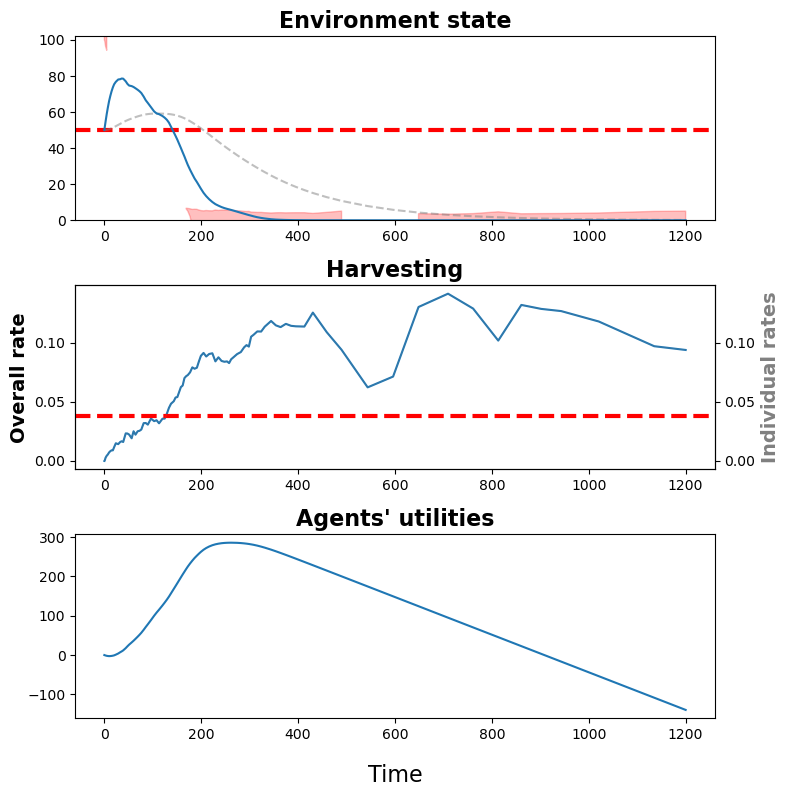

In [9]:
from gxr.envir import Config, DynamicsPlotter, EnvirDynamics, EnvirModel

# Configuration for the game; only value to override must be provided;
# all other options are set to reasonable defaults.
# Use '.from_disk()' method to populate a config with value from a '.toml' file.
params = {
    "foresight": {
        "horizon": .1,
    },
    "model": {
        "n_agents": 1,
        "behavior": {
            "eta": .1,
            "rules": {
                "foresight": {
                    "alpha": 0
                }
            }
        }
    }
}
config   = Config(params)
model    = EnvirModel(**config["model"])
dynamics = EnvirDynamics(model)

sol  = dynamics.run(10, progress=True)#.sample(relative=True)
T, E, P, H, R = sol.get_arrays()

plotter = DynamicsPlotter(dynamics, sol)
fig, axes = plotter.subplots(nrows=3, figsize=(8, 8))

plotter.plot_state(axes[0], show_vicious=True, show_perceived=True)
plotter.plot_harvesting(axes[1])
plotter.plot_utilities(axes[2])
fig.tight_layout()
fig